
# IMAGE PROCESSING USING FFT AND GAUSSIAN FILTER

## IMPORTS

In [141]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image, ImageFilter
from os import listdir
from matplotlib.image import imread 

## FUNCTIONS 

In [142]:
def plot_images(images, title = None):

  # A function to plot all images 


  plt.rcParams['figure.figsize'] = [26,26]
  plt.rcParams.update({'font.size': 18})

  fig = plt.figure()
  axes=[]

  fontsize = 20
  color = '#283655'
  n = 5
  y = .56
  j = 0

  cmap = None

  plt.figtext(0.125, y, 'Image - Original ', fontsize = fontsize, fontname = 'monospace', color = color)
  plt.figtext(0.285, y, 'Image - Gray scale', fontsize = fontsize, fontname = 'monospace', color = color)
  plt.figtext(0.445, y, 'Image - Log/Fourier', fontsize = fontsize, fontname = 'monospace', color = color)
  plt.figtext(0.605, y, 'Image - Gaussian Filter', fontsize = fontsize, fontname = 'monospace', color = color)
  plt.figtext(0.765, y, 'Image - Log/Fourier', fontsize = fontsize, fontname = 'monospace', color = color)
 
  for i in range(len(images)):
    
    axes.append(fig.add_subplot(1, n, j+1))
    axes[j].set_axis_off()

    j = j + 1

    plt.imshow(images[i], cmap = cmap)
    cmap = 'gray'
    
    if j == n:

      plt.show
      j = 0
      axes = []
      fig = plt.figure()

In [143]:
def comprehension(vetor, func):

  array = list()

  for i in range(len(vetor)):
    
    if func == np.mean or func == np.reshape:
      array.append(func(vetor[i], -1))

    else:
      array.append(func(vetor[i]))

  return np.array(array)

In [144]:
def get_images():

    images_raw = list()
    
    # directory_scr = r"C:\Users\VCHAGAS\Documents\GitHub\image_treatment\Fotos"
    directory_scr = r"/content" # put your directory here
    
    for images in listdir(directory_scr):

      if images == '.config' or images == 'sample_data':
        pass

      else:
         path = directory_scr + r'/' + images
         images_raw.append(Image.open(path))
        
    return images_raw

## PROCESSING

In [145]:
images_tot = list()
images_gau = list()

radius = 1 # size of kernel radio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [146]:
images_raw = np.array(get_images())
images_gray = np.array(comprehension(images_raw, np.mean))

images_fourier_raw = np.array(comprehension(images_gray, np.fft.fft2))
images_fourier = comprehension(comprehension(images_fourier_raw, np.abs), np.log)

for i in range(len(images_raw)):
  images_gau.append(images_raw[i].filter(ImageFilter.GaussianBlur(radius = h)))

images_gray_gau = np.array(comprehension(images_gau, np.mean))
images_fourier_raw_gau = comprehension(images_gray_gau, np.fft.fft2)
images_fourier_gau = comprehension(comprehension(images_fourier_raw_gau, np.abs), np.log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


In [147]:
for i in range(len(images_raw)):

  images_tot.append(images_raw[i])
  images_tot.append(images_gray[i])
  images_tot.append(images_fourier[i])
  images_tot.append(images_gau[i])
  images_tot.append(images_fourier_gau[i])

## PLOTING

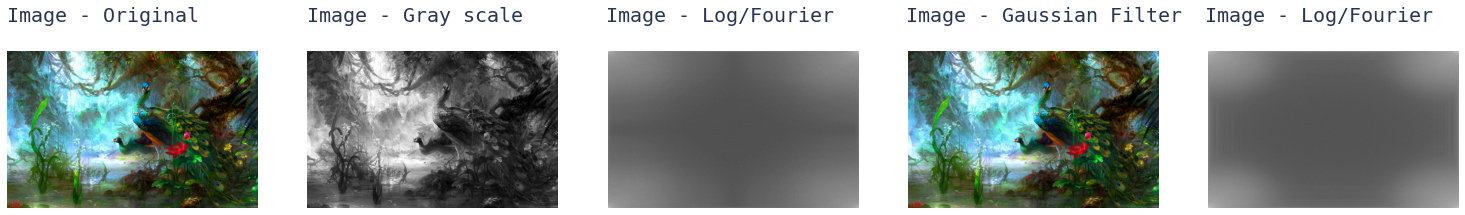

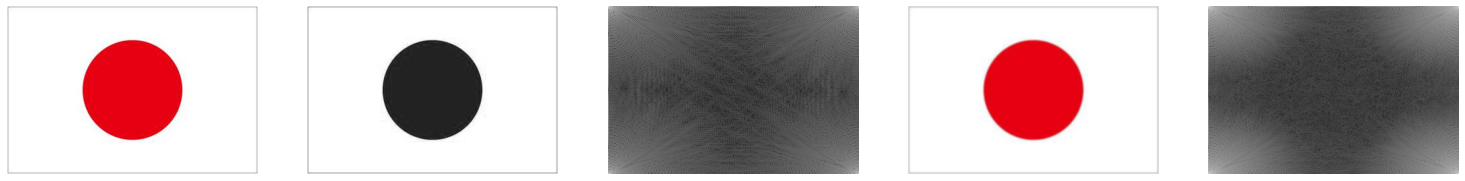

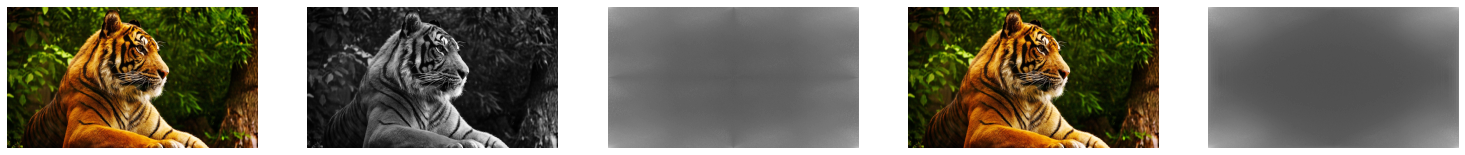

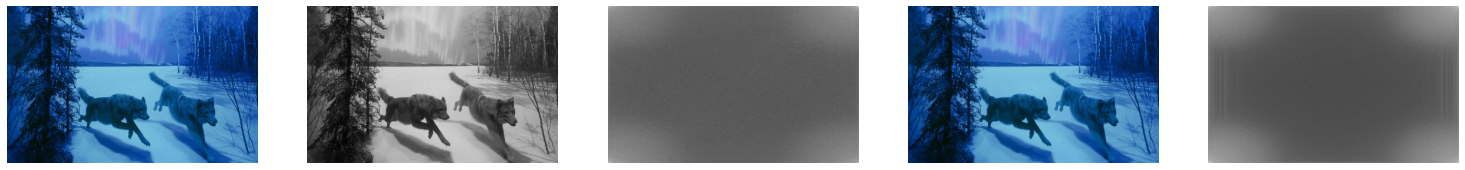

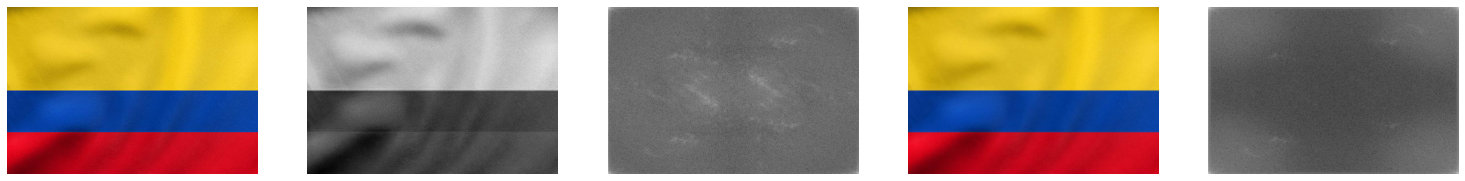

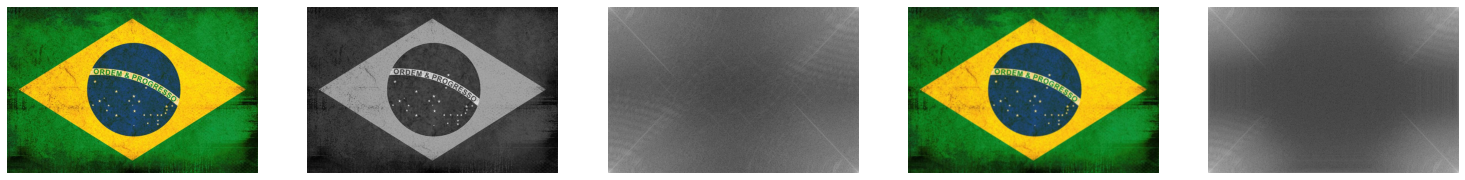

<Figure size 1872x1872 with 0 Axes>

In [148]:
plot_images(images_tot)